# Nearly Free Electron Model

K. Makulowich September 20, 2020 University of Toronto For technical issues: k.makulowich@mail.utoronto.ca

In the previous module, we looked at the base case of the nearly free electron model, the empty lattice approximation. This module will examine what happens to the energy bands when a small, periodic potential is applied. This periodic potential represents the effect of ions present in the crystal structure. The period of this potential must match that of the lattice.

In this example, the potential profile will possess a simple sinusoidal form with periodicity matching that of the lattice.

$V(x) = V_0cos(\frac{2\pi x}a)$

The maximum potential, $V_0$, must be less than the total electron energy. $V_0 < E_{tot}$. This implies that the electron remains nearly free or exist within a weak external potential. For this example, $E_{tot}$ is set to the energy of the free electron at the first Brillouin zone boundary, $k=\frac{\pi}a$.

## How to use:

Set the potential as a function of $E_{tot}$ using the slider in Figure A and examine what happens to the energy bands in the extended zone scheme and the reduced zone scheme in Figure B. Remember to refresh Figure B after modifying the slider in Figure A.


<IPython.core.display.Javascript object>


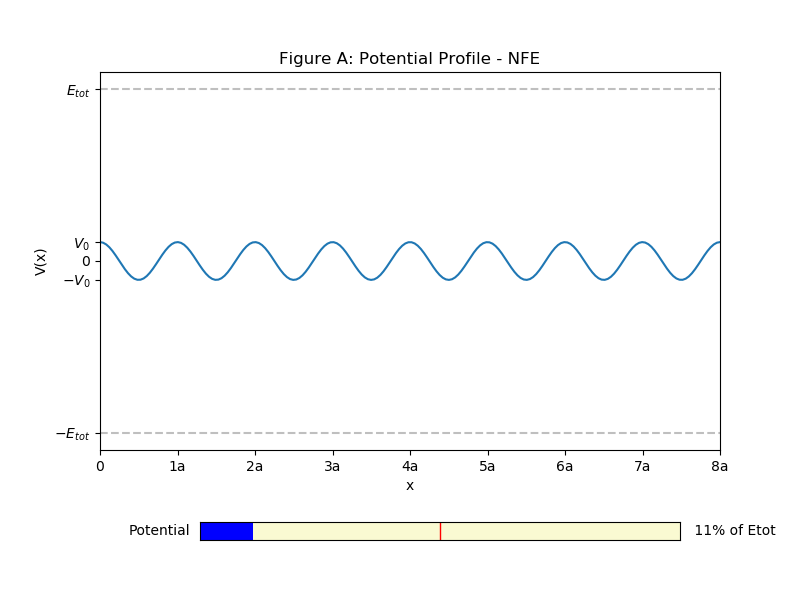

In [1]:
#$$$Collapse$$$$

#Construct the potential in real space
%matplotlib notebook
import MSE430Funcs.NFEfuncs as nfe
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

#Constants:
hbar=1.05e-34# J s
a=1e-10 #m
m_e=9.11e-31 #kg

fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(1,1,1)
plt.subplots_adjust(bottom=0.25)

#Calculate total energy of electron at Brillouin zone edge
Etot = hbar**2 * (np.pi/a)**2/(2*m_e) #J

#Set the max potential at lattice points 
#as a function of total energy of electron
V0 = Etot*.5 #J

x = np.linspace(0, 8*a, 200)

#Set potential profile as cosine
Vx = V0 * np.cos(2*np.pi*x/a)

pp,=ax1.plot(x, Vx)
nfe.potGraph(a, Etot, V0, ax1)

axcolor = 'lightgoldenrodyellow'
axL = plt.axes([0.25, 0.1, 0.60, 0.03], facecolor=axcolor)

sL = Slider(axL, 'Potential', 0,100, valinit=50, valstep = 1, valfmt= ' %1.f%% of Etot', facecolor='blue')

def update(val):
    V = sL.val*.01*Etot
    pp.set_ydata(V * np.cos(2*np.pi*x/a))
    ax1.set_yticks([-Etot, -V, 0, V, Etot])
    fig1.canvas.draw_idle()
    


sL.on_changed(update)

plt.show()

Using the slider in Figure A, adjust the potential as a function of the total energy of the electron. Then, examine how this affects the dispersion relation in Figure B.
What happens when $V_0 \rightarrow 0$ or $V_0 \rightarrow E_{tot}$? At what $k$ values do the bandgaps appear? Also, how does the gap size depend on the strength of the potential?

*After adjusting the slider remember to refresh the Figure B below (select and run the cell) to update it with your new potential value.


<IPython.core.display.Javascript object>


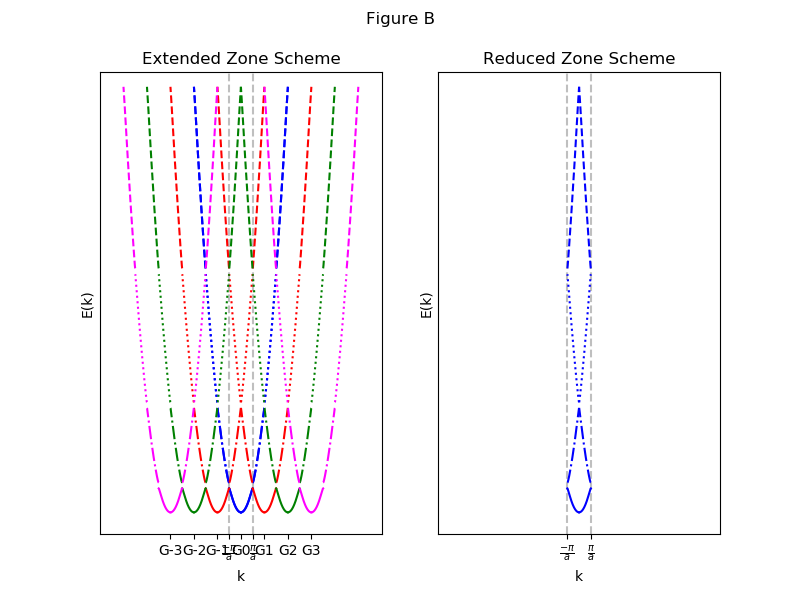

In [2]:
V0 = sL.val*.01*Etot

fig3 = plt.figure(figsize=(8,6))

ax3 = fig3.add_subplot(1,2,1)
ax4 = fig3.add_subplot(1,2,2)
fig3.suptitle('Figure B')
nfe.exScheme(ax3, ax4, V0)

nfe.graphSetUp(ax3, ax4)